<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_14/class_14_video_001_load_and_get_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import feature
import numpy as np

In [2]:
!gdown 1mx3LUdeFO1-KFzClhFVwu71KWM3-s1hO

Downloading...
From: https://drive.google.com/uc?id=1mx3LUdeFO1-KFzClhFVwu71KWM3-s1hO
To: /content/strawberry.mp4
100% 7.87M/7.87M [00:00<00:00, 117MB/s]


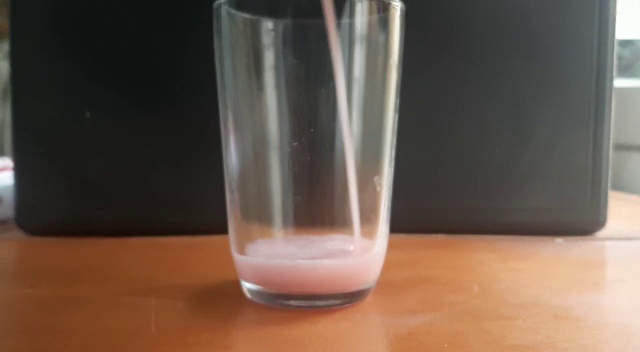

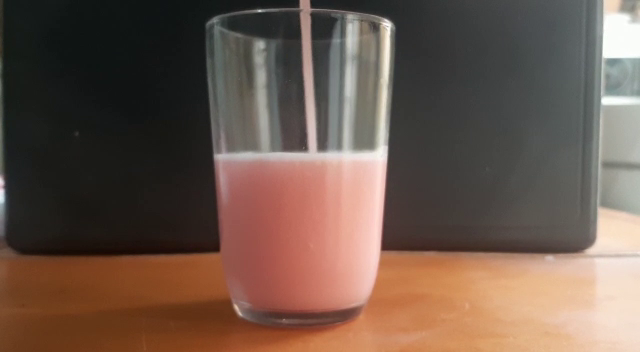

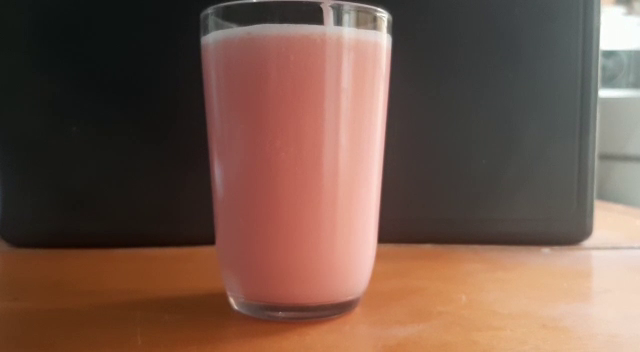

In [3]:
name_video = 'strawberry.mp4'
cap = cv2.VideoCapture(name_video)
cont = 0 
filtro =  300
if cap.isOpened() == False:
  print('video not found')

k = 0
images=[]
matrixA =[]

while cap.isOpened():
  cont = cont + 1
  ret,frame =cap.read()

  if ret == True:
    if(cont % filtro == 0):
      
      images.append(frame)
      k += 1
      gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
      matrixA.append(gray)
      cv2_imshow(frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
      break
  else:
    break

matrixA = np.array(matrixA)    # convert to numpy array



# create the background image b
b = np.median(matrixA,axis=0) # calculate the median
b = b.astype(np.uint8) # change the data type

cap.release()
cv2.destroyAllWindows()

In [4]:
matrixA.shape, k, cont,b.shape

((3, 352, 640), 3, 1030, (352, 640))

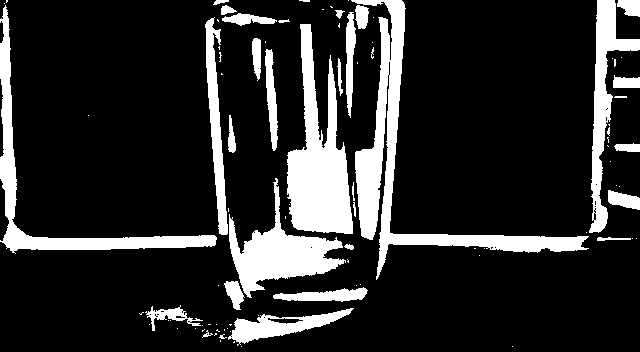

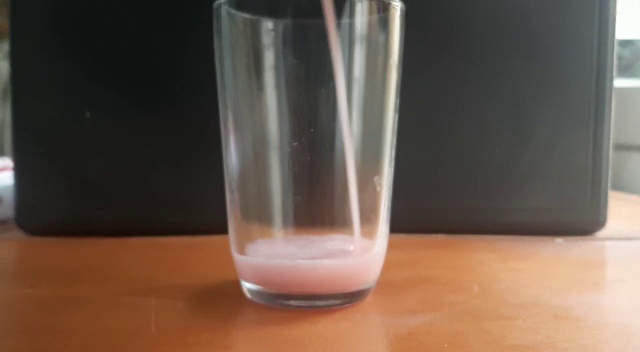

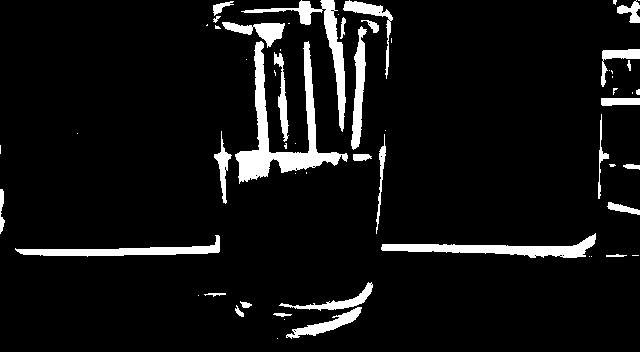

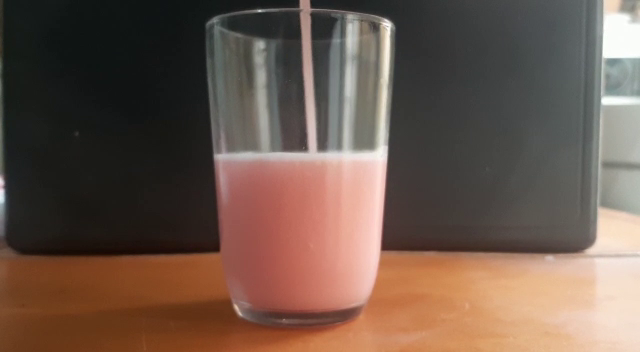

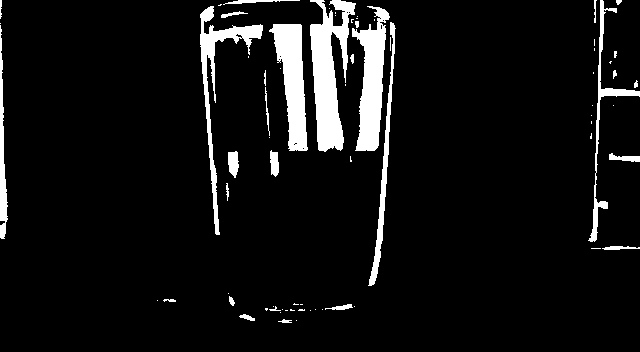

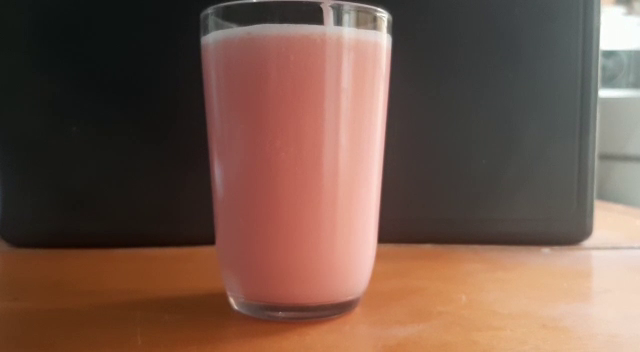

In [5]:

cap = cv2.VideoCapture(name_video)
cont = 0 
filtro =  300
flag = 1 # get the first image

if cap.isOpened() == False:
  print('video not found')

k = 0

while cap.isOpened():
  cont = cont + 1
  ret,frame =cap.read()

  if(cont == flag):
    b_ref = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

  if ret == True:
    if(cont % filtro == 0):
      
      k += 1
      gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
      g = cv2.absdiff(gray, b) # image differece
      #g = cv2.absdiff(gray, b_ref) # image differece
      _, gT = cv2.threshold(g, 25, 255, cv2.THRESH_BINARY)
      cv2_imshow(gT)
      cv2_imshow(frame)
  else:
    break
cap.release()
cv2.destroyAllWindows()

In [6]:
k

3